In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torchtext.data import Field, TabularDataset, BucketIterator, Iterator
import torchtext
import matplotlib.pyplot as plt

import copy
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from transformers import BertTokenizer, BertForSequenceClassification

In [2]:
'''
The lengths of sentences in this dataset will not exceed 512, which is the max length that BertTokenizer can handle.
'''
train_data = pd.read_csv('./origin_data/train_filtered_bf.txt', sep='\t', header=None)
test_data = pd.read_csv('./origin_data/test_filtered_bf.txt', sep='\t', header=None)

In [3]:
print('Loading pretrained tokenizer...')
pretrain_model = "bert-base-uncased"
additional_special_tokens = ['[E1]', '[/E1]', '[E2]', '[/E2]']
tokenizer = BertTokenizer.from_pretrained(pretrain_model, do_lower_case=False)
print(len(tokenizer))
tokenizer.add_tokens(['[E1]', '[/E1]', '[E2]', '[/E2]'])
print(len(tokenizer))
e1_id = tokenizer.convert_tokens_to_ids('[E1]')
e2_id = tokenizer.convert_tokens_to_ids('[E2]')

print(e1_id, e2_id)
assert e1_id != e2_id != 1

Loading pretrained tokenizer...
Downloading: 100%|██████████| 232k/232k [00:00<00:00, 802kB/s]30522
30526
30522 30524



In [5]:
sentence_len = []
input_ids = []
attention_masks = []

num = 0
for sent in tqdm(train_data.iloc[:, 1]):
    tokens = tokenizer.tokenize(sent)
    sentence_len.append(len(tokens))


In [6]:
sen_len = pd.DataFrame(sentence_len)
sen_len.columns=['len']
sen_len_p = sen_len.groupby('len')['len'].count()
plt.plot(sen_len_p.index, sen_len_p.values)

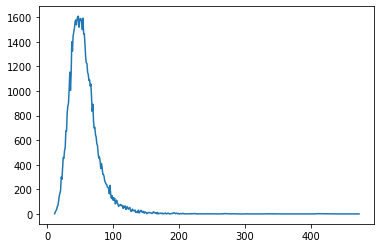

In [7]:
max_len = 128
tag_list = []
sent_list = []
for i in tqdm(range(len(train_data))):
    tag = train_data.loc[i, 0]
    sent = train_data.loc[i, 1]
    tokens = tokenizer.tokenize(sent)
    if len(tokens)<max_len:
        tag_list.append(tag)
        sent_list.append(sent)
sentence_128 = pd.DataFrame({'tag':tag_list, 'sent':sent_list})

In [10]:
sentence_128.to_csv('./origin_data/sentence_128.txt', sep='\t', header=False, index=False)